# CCT College Dublin 

## Module Title: 
Machine Learning for AI
## Assessment Title
ML_CA2
## Lecturer Name:
David McQuaid
## Student Full Name/ID:
Lucresse Pearle Tchatchoua Mbakop – 2021404
## Assessment Due Date:
31th May 2024 23:59
## Date of Submission:


### Declaration 			
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.

### Github Link
https://github.com/LucressePearle/LucressePearle_ML_CA2

In [2]:
import  pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# PART 1: Neural Networks
I start by loading my dataset provided in Moodle named "BankRecords.csv".

In [3]:
#reading the dataset
bank_df = pd.read_csv("BankRecords.csv")
display(bank_df)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,No,No,Yes,No


## Data understanding
in this phase of our project, we are exploring the dataset with aim to undercover useful information

In [23]:
bank_df.nunique()

ID                       5000
Age                        45
Experience(Years)          44
Income(Thousands's)       162
Sort Code                 467
Family                      4
Credit Score              108
Education                   3
Mortgage(Thousands's)     347
Personal Loan               2
Securities Account          2
CD Account                  2
Online Banking              2
CreditCard                  2
dtype: int64

In [4]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

the information above tell us that the dataset above contains
- 08 numerical variables
- 06 categorical variables
- 14 columns and 5000 rows

we move on an implement the "describe" function to gain the statistical summary of the numerical variables

In [5]:
stat= bank_df.describe()
display(stat)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


from the above statistical values we can notice that(Venkataramanan 2021):
- for the experience variable where the min value is "-3" which is logically impossible.
- the age, income variables seem to have wide spread data points meaning that that they are variance between the standard deviation and the mean
- we can also notice the high difference between the std and mean of the mortgage variable , also with a 25th percentile being 0 and meadian 0 but the 75th percentile being 101 shows that the most of the customer do not have mortgage (we can explore in the future the age range of people with mortgage).


Now i am going to explore the categorical variables 

In [7]:
stat_cat= bank_df.describe(include=object)
display(stat_cat)

,Education,Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
count,5000,5000,5000,5000,5000,5000
unique,3,2,2,2,2,2
top,Diploma,No,No,No,Yes,No
freq,2096,4520,4478,4698,2984,3530


from the above we can notice that each variable have
- 2 to 3 unique entries, this will be helpful in the encoding process of my variables.
- the most frequent unique outcomes are displayed in the "top"
- and most customer do not have personal loan or credit card due to the high frequency of NO 

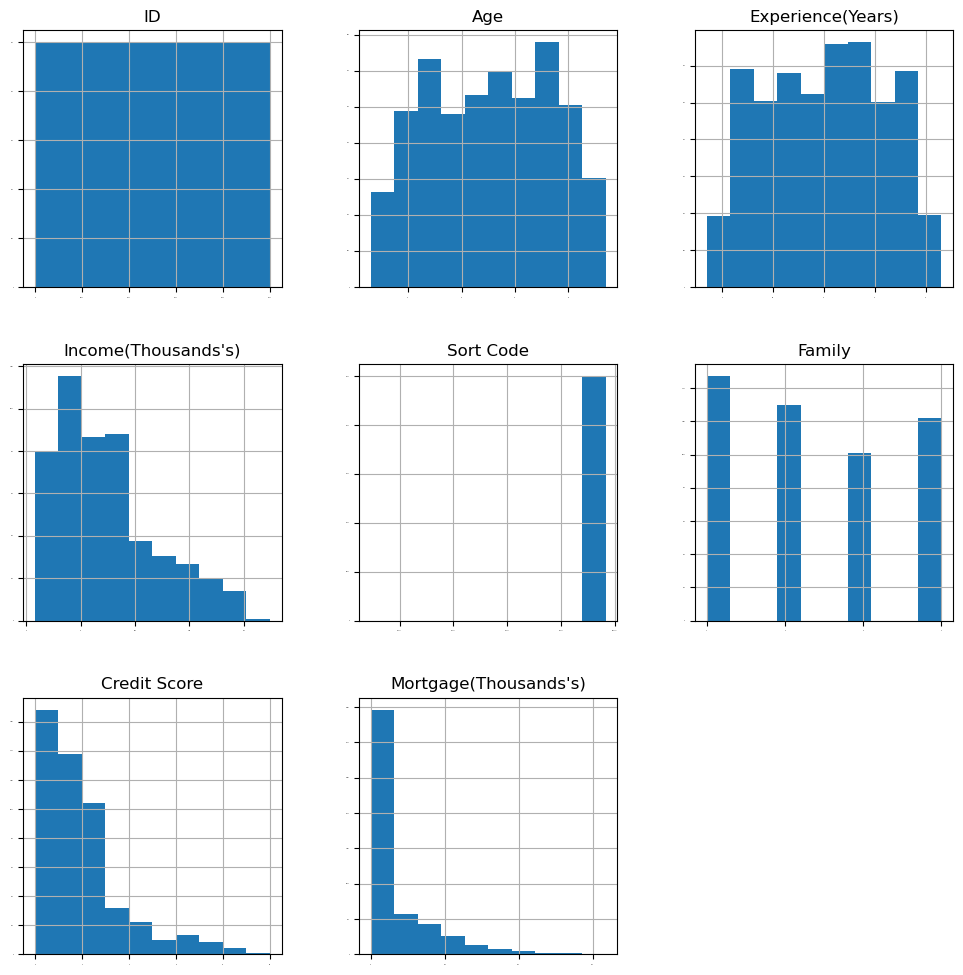

In [12]:
bank_df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

we will not be evaluating the ID and sort Code graph because they are unique identifier, the sort code in the banking industry is use to identify the branch of the bank the customer belongs to.
 From the Histogram above i can notice that age and experience seems to be symmetric compared to income, credit score and mortgage variables that seems to have a right-skewed distribution.

## Data preparation
in this data processing phase, i will evaluate the quality of my data by identifying missing values, outliers and handling categorical variables.
### Data cleaning

In [17]:
missing_values = bank_df.isnull().any()
display(missing_values)

ID                       False
Age                      False
Experience(Years)        False
Income(Thousands's)      False
Sort Code                False
Family                   False
Credit Score             False
Education                False
Mortgage(Thousands's)    False
Personal Loan            False
Securities Account       False
CD Account               False
Online Banking           False
CreditCard               False
dtype: bool

we can see that the dataset has no missing values, we will then check if it contains negative values

In [18]:
negative_values = (bank_df.select_dtypes(include=[float, int]) < 0).sum()
display(negative_values)


ID                        0
Age                       0
Experience(Years)        52
Income(Thousands's)       0
Sort Code                 0
Family                    0
Credit Score              0
Mortgage(Thousands's)     0
dtype: int64

our data seems to have 52 negatives values in the experience(years) variable which is not possible cause we can not have negative years of experience. To handle that we are going to replace the negative values with their absolute value

In [20]:
bank_df['Experience(Years)']= bank_df['Experience(Years)'].abs()
negative_values_2 = (bank_df.select_dtypes(include=[float, int]) < 0).sum()
display(negative_values_2)

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands's)      0
Sort Code                0
Family                   0
Credit Score             0
Mortgage(Thousands's)    0
dtype: int64

for further analysis , we will identify the count of zero values in each coulumns


In [24]:
zero_col =(bank_df == 0).sum()
display(zero_col)

ID                          0
Age                         0
Experience(Years)          66
Income(Thousands's)         0
Sort Code                   0
Family                      0
Credit Score              106
Education                   0
Mortgage(Thousands's)    3462
Personal Loan               0
Securities Account          0
CD Account                  0
Online Banking              0
CreditCard                  0
dtype: int64

## Outliers
in this step , we will identify and handle the outliers. Here we will not be working withe sort code and the id

In [25]:
#
outliers_col= bank_df[["Age","Experience(Years)","Income(Thousands's)","Family","Credit Score","Mortgage(Thousands's)"]] 
# defining the  quartiles 
Q1 = outliers_col.quantile(0.25)
Q3 = outliers_col.quantile(0.75)
IQR = Q3 - Q1
# setting the threshold for outliers
threshold = 1.5
outliers = (outliers_col< (Q1 - threshold * IQR)) | (outliers_col > (Q3 + threshold * IQR))
# Count the number of outliers in each column
outliers_counting = outliers.sum()
print("Number of outliers in each column:")
print(outliers_counting)

Number of outliers in each column:
Age                        0
Experience(Years)          0
Income(Thousands's)       96
Family                     0
Credit Score             324
Mortgage(Thousands's)    291
dtype: int64


how are we going to handle this outliers? in our case the outliers in the mortgage variable could be a usefull noice in our dataset cause not everyone has a mortgage.
For the moment we will not handle them and see how they work with the models before changing.